# Airlines Data Analysis using SQL and Python

### The objective of this SQL data analysis project is to identify strategies for improving occupancy rates on underperforming flights, thereby enhancing overall airline profitability.

## Import Library

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Database Connection

In [19]:
connection = sqlite3.connect('/Users/tamojitsaha/Downloads/travel.sqlite')
cursor = connection.cursor()

In [28]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print("List of Tables in the Database")
table_list=[table[0] for table in cursor.fetchall()]
table_list

List of Tables in the Database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

## Data Exploration

In [30]:
aircrafts_data = pd.read_sql_query("SELECT * FROM aircrafts_data",connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [34]:
aircrafts_data.shape

(9, 3)

In [36]:
aircrafts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aircraft_code  9 non-null      object
 1   model          9 non-null      object
 2   range          9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ bytes


In [58]:
airports_data = pd.read_sql_query("SELECT * FROM airports_data", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [60]:
boarding_passes = pd.read_sql_query("SELECT * FROM boarding_passes", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [62]:
bookings = pd.read_sql_query("SELECT * FROM bookings", connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [64]:
flights = pd.read_sql_query("SELECT * FROM flights", connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [66]:
seats = pd.read_sql_query("SELECT * FROM seats", connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [68]:
ticket_flights = pd.read_sql_query("SELECT * FROM ticket_flights", connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [69]:
tickets = pd.read_sql_query("SELECT * FROM tickets", connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [94]:
for table in table_list:
    query=f"PRAGMA table_info({table});".format(table)
    result=pd.read_sql_query(query,connection)
    print(f'\ntable : {table}')
    print(result)


table : aircrafts_data
   cid           name          type  notnull dflt_value  pk
0    0  aircraft_code  character(3)        1       None   0
1    1          model         jsonb        1       None   0
2    2          range       INTEGER        1       None   0

table : airports_data
   cid          name          type  notnull dflt_value  pk
0    0  airport_code  character(3)        1       None   0
1    1  airport_name         jsonb        1       None   0
2    2          city         jsonb        1       None   0
3    3   coordinates         point        1       None   0
4    4      timezone          TEXT        1       None   0

table : boarding_passes
   cid         name                  type  notnull dflt_value  pk
0    0    ticket_no         character(13)        1       None   0
1    1    flight_id               INTEGER        1       None   0
2    2  boarding_no               INTEGER        1       None   0
3    3      seat_no  character varying(4)        1       None   0

tab

## Observation

#### 1. Identified missing values in the dataset.
#### 2. Detected data entries in multiple languages.
#### 3. We need to keep only understandable data

### For Finding Missing Values

In [109]:
for table in table_list:
    print(f'\ntable : {table}')
    df_query=pd.read_sql_query(f"SELECT * FROM {table}",connection)
    print(df_query.isnull().sum())


table : aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table : airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table : boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table : bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table : flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table : seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table : ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table : tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


# Basic Analysis

### How many planes have more than 100 seats :

In [124]:
query = "SELECT aircraft_code,COUNT(*) AS number_of_seats FROM seats GROUP BY aircraft_code HAVING number_of_seats > 100"
pd.read_sql_query(query,connection)

,aircraft_code,number_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


###  Change in Number of Tickets Booked and Total Amount Earned Over Time:

In [142]:
query1 = """SELECT t.ticket_no,t.book_ref,t.passenger_id,b.book_date,b.total_amount 
FROM tickets t JOIN bookings b 
ON t.book_ref=b.book_ref"""
tickets = pd.read_sql_query(query1,connection)
tickets

,ticket_no,book_ref,passenger_id,book_date,total_amount
0,0005432000987,06B046,8149 604011,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,2017-07-03 04:37:00+03,30900
...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,2017-08-14 11:50:00+03,210600
366729,0005435999870,D730BA,6535 751108,2017-08-14 11:50:00+03,210600
366730,0005435999871,A1AD46,1596 156448,2017-08-13 03:49:00+03,45900
366731,0005435999872,7B6A53,9374 822707,2017-08-15 15:54:00+03,219400


In [314]:
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
tickets.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
date                               object
dtype: object

In [316]:
tickets

,ticket_no,book_ref,passenger_id,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,2017-08-15 15:54:00+03:00,219400,2017-08-15


In [318]:
x = tickets.groupby('date')[['date']].count()
x

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


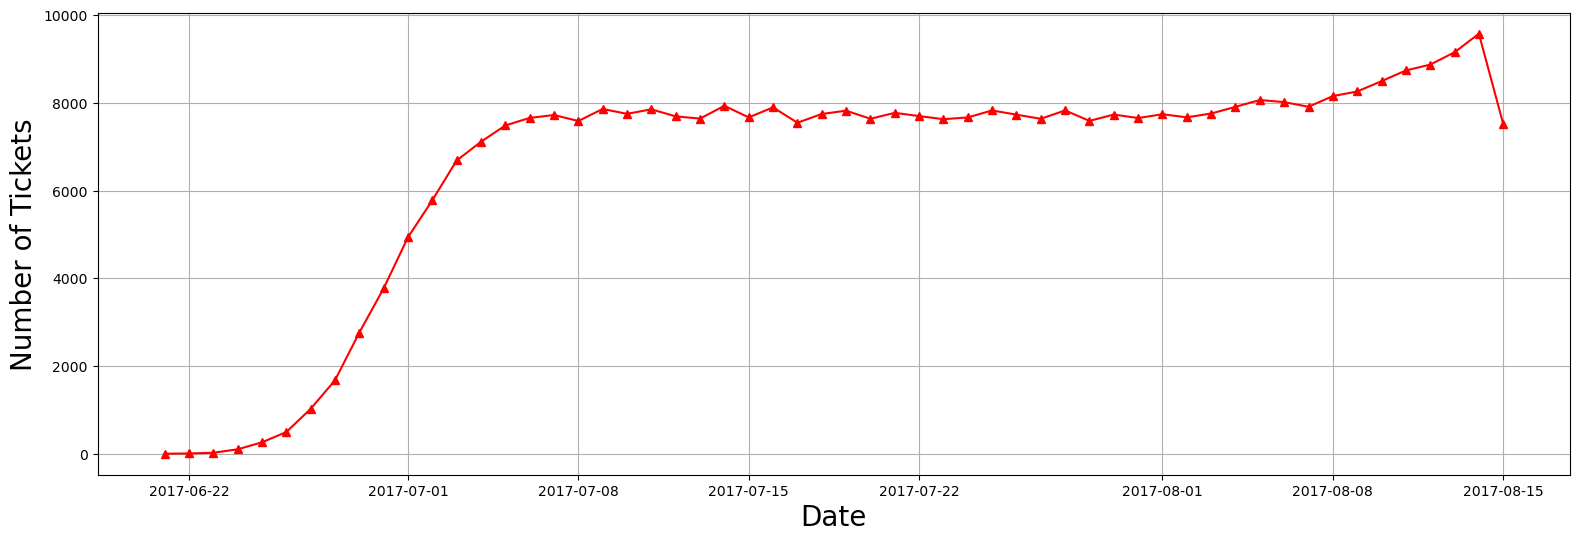

In [320]:
plt.figure(figsize = (19,6))
plt.plot(x.index,x['date'],marker='^',color='red')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Tickets', fontsize = 20)
plt.grid('b')

In [322]:
bookings= pd.read_sql_query("SELECT * FROM bookings",connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [324]:
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
x = bookings.groupby('date')[['total_amount']].sum()
x

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


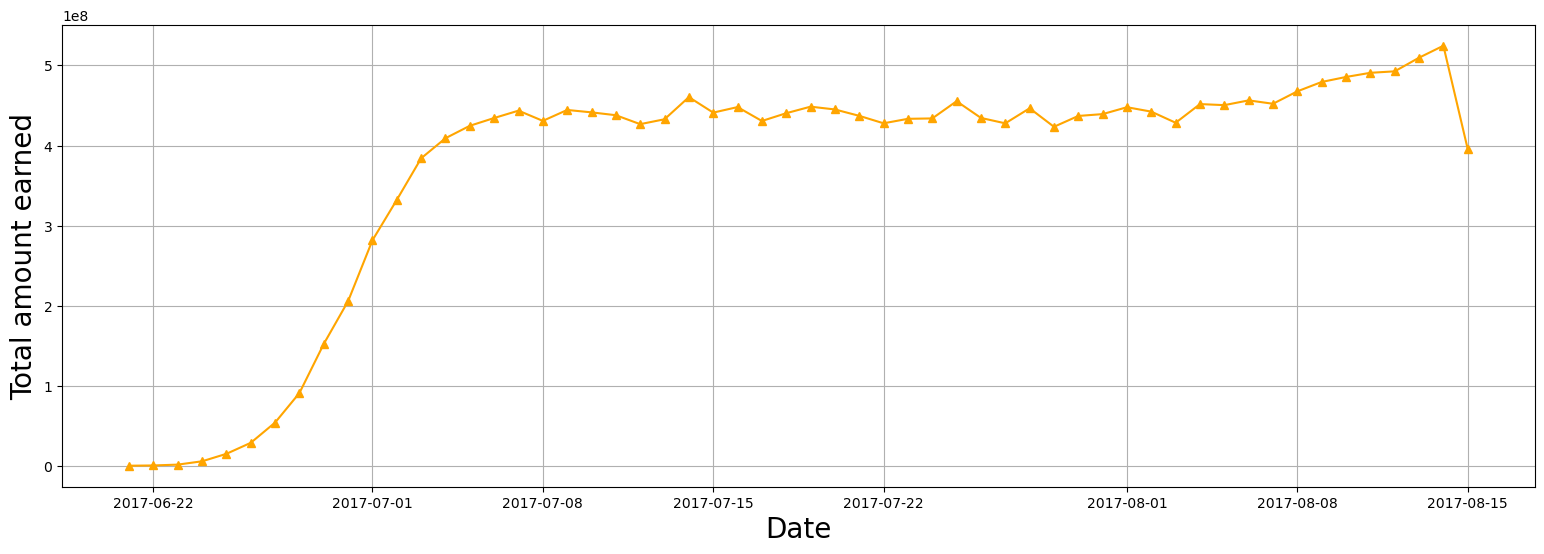

In [326]:
plt.figure(figsize =(19,6))
plt.plot(x.index, x['total_amount'], marker = '^',color='orange')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total amount earned', fontsize = 20)
plt.grid('b')
plt.show()

### Calculate the average charges for each aircraft with different fare conditions

In [333]:
df = pd.read_sql_query(""" SELECT t.flight_id,t.ticket_no,t.fare_conditions,t.amount,f.flight_no,f.scheduled_departure, 
f.scheduled_arrival,f.departure_airport,f.arrival_airport	
FROM 
ticket_flights t JOIN flights f 
ON t.flight_id = f.flight_id""", connection)
df

,flight_id,ticket_no,fare_conditions,amount,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport
0,30625,0005432159776,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO
1,30625,0005435212351,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO
2,30625,0005435212386,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO
3,30625,0005435212381,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO
4,30625,0005432211370,Business,42100,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO
...,...,...,...,...,...,...,...,...,...
1045721,32094,0005435097522,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS
1045722,32094,0005435097521,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS
1045723,32094,0005435104384,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS
1045724,32094,0005435104352,Economy,5200,PG0708,2017-09-14 17:15:00+03,2017-09-14 18:00:00+03,SGC,OVS


In [349]:
df1 = pd.read_sql_query(""" SELECT t.fare_conditions, f.aircraft_code, AVG(amount) as average_amount 
FROM ticket_flights t JOIN flights f 
ON t.flight_id = f.flight_id GROUP BY aircraft_code, fare_conditions""", connection)
df1

,fare_conditions,aircraft_code,average_amount
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


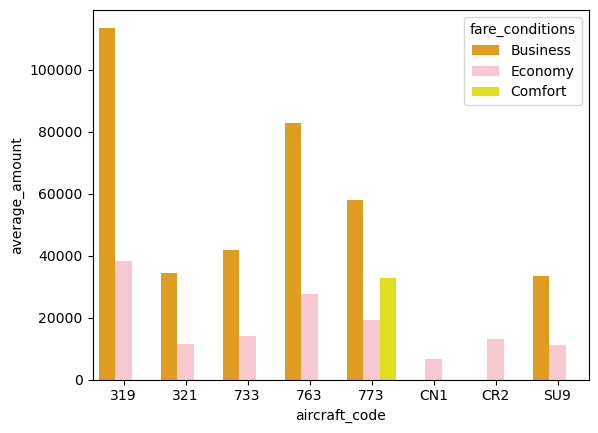

In [377]:
sns.barplot(data = df1, x = 'aircraft_code', y = 'average_amount', hue = 'fare_conditions', 
            palette={'Economy': 'pink', 'Business': 'orange', 'Comfort': 'yellow'})
plt.show()

# Analyzing Occupancy Rate

In [496]:
seat_occupancy = pd.read_sql_query("""
    SELECT f.flight_id, s.fare_conditions,f.aircraft_code, COUNT(s.seat_no) AS total_seats, 
           COUNT(bp.seat_no) AS occupied_seats
    FROM seats s
    JOIN flights f ON f.aircraft_code = s.aircraft_code
    LEFT JOIN boarding_passes bp ON bp.flight_id = f.flight_id AND bp.seat_no = s.seat_no
    GROUP BY f.flight_id, s.fare_conditions
""", connection)
seat_occupancy['occupancy_rate'] = seat_occupancy['occupied_seats'] / seat_occupancy['total_seats']
seat_occupancy

,flight_id,fare_conditions,aircraft_code,total_seats,occupied_seats,occupancy_rate
0,1,Business,321,28,12,0.42857142857142855
1,1,Economy,321,142,67,0.47183098591549294
2,2,Business,321,28,14,0.5
3,2,Economy,321,142,87,0.6126760563380281
4,3,Business,321,28,15,0.5357142857142857
...,...,...,...,...,...,...
48526,33117,Economy,CR2,50,16,0.32
48527,33118,Economy,CR2,50,16,0.32
48528,33119,Economy,CR2,50,0,0.0
48529,33120,Economy,CR2,50,13,0.26


### Calculate the total annual revenue and the average revenue per ticket for each aircraft :

In [477]:
pd.read_sql_query(""" SELECT aircraft_code, ticket_count, total_revenue, total_revenue/ticket_count AS avg_revenue_per_ticket 
FROM (SELECT aircraft_code, COUNT(*) AS ticket_count, SUM(amount) AS total_revenue 
FROM ticket_flights JOIN flights 
ON ticket_flights.flight_id = flights.flight_id GROUP BY aircraft_code)""", connection)

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


### Calculate the average occupancy per aircraft

In [502]:
avg_occupancy_rate = pd.read_sql_query(""" SELECT a.aircraft_code, AVG(a.seats_count) AS booked_seats, 
b.num_seats, AVG(a.seats_count)/b.num_seats AS average_occupancy_rate 
FROM (SELECT aircraft_code, flights.flight_id, COUNT(*) AS seats_count FROM boarding_passes 
JOIN flights ON boarding_passes.flight_id = flights.flight_id GROUP BY aircraft_code, flights.flight_id) 
AS A JOIN (SELECT aircraft_code, COUNT(*) AS num_seats 
FROM seats GROUP BY aircraft_code) AS b ON a.aircraft_code = b.aircraft_code GROUP BY a.aircraft_code""", connection)
avg_occupancy_rate

,aircraft_code,booked_seats,num_seats,average_occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


## Determine the potential increase in total annual turnover if all aircraft achieve a 10% higher occupancy rate.

In [516]:
avg_occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate'] * 0.1
avg_occupancy_rate

,aircraft_code,booked_seats,num_seats,average_occupancy_rate,Inc occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [518]:
pd.set_option("display.float_format", str)

In [520]:
total_revenue = pd.read_sql_query(""" SELECT f.aircraft_code, SUM(amount) AS total_revenue FROM ticket_flights t
JOIN flights f ON t.flight_id = f.flight_id GROUP BY aircraft_code""", connection)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [563]:
avg_occupancy_rate['Inc Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate']) * occupancy_rate['Inc occupancy rate']
avg_occupancy_rate

,aircraft_code,booked_seats,num_seats,average_occupancy_rate,Inc occupancy rate,Inc Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


# Overall occupancy rate distribution across different fare conditions :

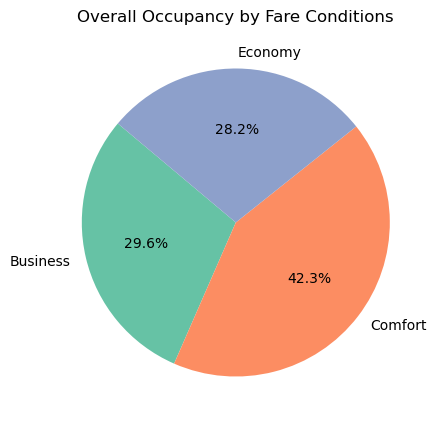

In [566]:
fare_occupancy = seat_occupancy.groupby('fare_conditions').agg(
    {'total_seats': 'sum', 'occupied_seats': 'sum'}).reset_index()
fare_occupancy['occupancy_rate'] = fare_occupancy['occupied_seats'] / fare_occupancy['total_seats']

plt.figure(figsize=(5, 5))
plt.pie(fare_occupancy['occupancy_rate'], labels=fare_occupancy['fare_conditions'], autopct='%1.1f%%',
        colors=sns.color_palette('Set2'), startangle=140)
plt.title('Overall Occupancy by Fare Conditions')
plt.show()

# Use a box plot to understand the distribution of occupancy rates for different fare conditions :

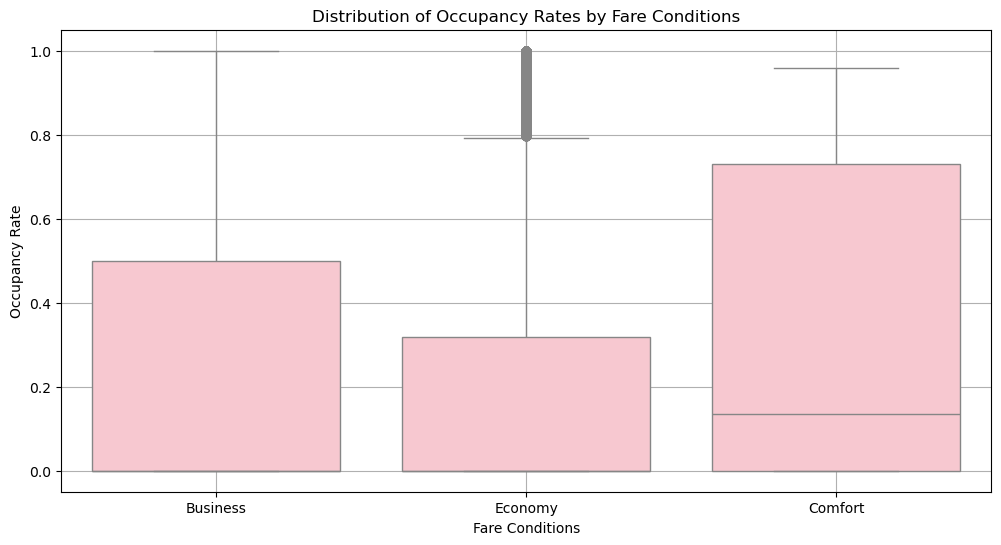

In [569]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fare_conditions', y='occupancy_rate', data=seat_occupancy,color='pink')
plt.xlabel('Fare Conditions')
plt.ylabel('Occupancy Rate')
plt.title('Distribution of Occupancy Rates by Fare Conditions')
plt.grid(True)
plt.show()

# Analyze how the occupancy rate changes over time :

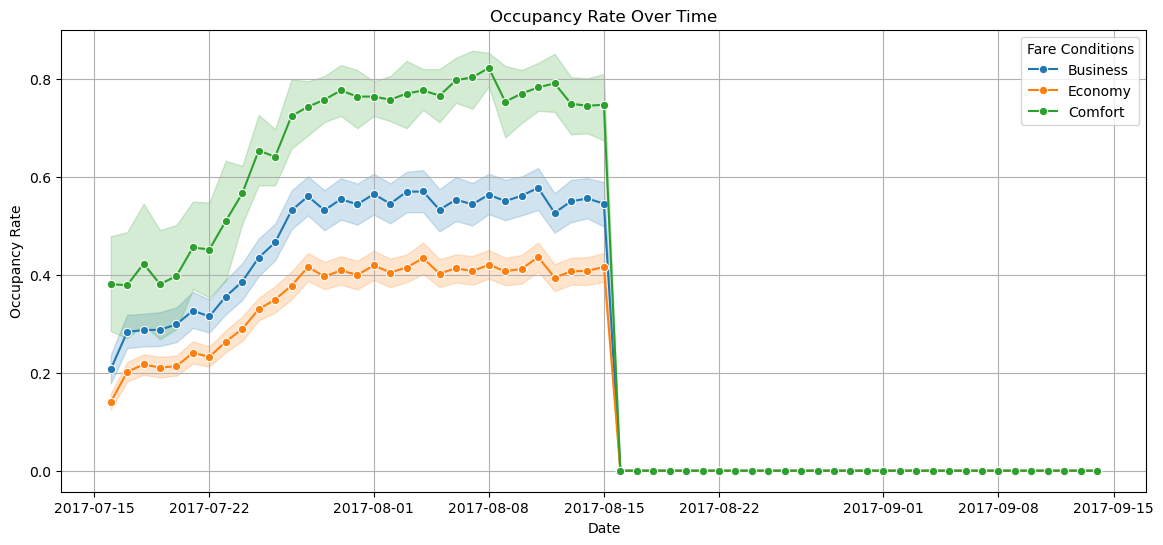

In [572]:
occupancy_over_time = pd.read_sql_query("""
    SELECT f.flight_id, f.scheduled_departure, s.fare_conditions, 
           COUNT(s.seat_no) AS total_seats, COUNT(bp.seat_no) AS occupied_seats
    FROM seats s
    JOIN flights f ON f.aircraft_code = s.aircraft_code
    LEFT JOIN boarding_passes bp ON bp.flight_id = f.flight_id AND bp.seat_no = s.seat_no
    GROUP BY f.flight_id, f.scheduled_departure, s.fare_conditions
""", connection)

occupancy_over_time['occupancy_rate'] = occupancy_over_time['occupied_seats'] / occupancy_over_time['total_seats']
occupancy_over_time['date'] = pd.to_datetime(occupancy_over_time['scheduled_departure']).dt.date

plt.figure(figsize=(14, 6))
sns.lineplot(data=occupancy_over_time, x='date', y='occupancy_rate', hue='fare_conditions', marker='o')
plt.title('Occupancy Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.grid(True)
plt.legend(title='Fare Conditions')
plt.show()